1. WHAT IS IMBALANCED DATA IN CLASSIFICATION:

Imbalanced data in classification refers to a dataset where the distribution of class labels is uneven, with one class significantly outnumbering the other. This imbalance can pose challenges for machine learning models, as they might exhibit bias towards the majority class, leading to poor performance in predicting the minority class.

2. Why is imbalanced data a problem in machine learning?

Imbalanced data is problematic in machine learning because models trained on such datasets may prioritize accuracy on the majority class while neglecting the minority class. This can result in biased models that perform poorly in identifying and generalizing patterns related to the minority class.

  
  3.What are common techniques to handle imbalanced data?

Common techniques to handle imbalanced data include oversampling the minority class, undersampling the majority class, using synthetic data generation methods (e.g., SMOTE), adjusting class weights, and employing specialized algorithms designed for imbalanced datasets.

4. How does oversampling and undersampling work?

Oversampling involves creating additional instances of the minority class to balance the class distribution, while undersampling reduces the number of instances in the majority class. Both techniques aim to create a more balanced dataset for training machine learning models.

5. When to use ensemble methods for imbalanced data?

Ensemble methods, such as Random Forests and BalancedBaggingClassifier, are effective for handling imbalanced data as they inherently address class imbalances. They can be particularly useful when there is a need for combining multiple models to achieve better generalization and robustness.

NOW WE ARE GOING TO START PERFORMING THE TASK ON OUR DATASET:

The dataset that we have consists of three columns: Platform, Comment, and Hateful, with 3000 entries. The Hateful column is a binary indicator where 0 indicates non-hateful comments and 1 indicates hateful comments. Here’s a summary:

Platform:
 The social media platform where the comment was posted.

Comment:
 The text of the comment.

Hateful:
 A binary label indicating whether the comment is hateful (1) or not (0).

Data Imbalance:

Data imbalance occurs when the classes in a dataset are not represented equally. In this context, it means that there are significantly more non-hateful comments than hateful ones, or vice versa.

Types of Data Imbalance

1. Binary Imbalance:
 This occurs in binary classification tasks, where one class is much more frequent than the other.
2. Multi-class Imbalance:
 This occurs in multi-class classification tasks, where some classes have significantly fewer instances than others.
3. Multi-label Imbalance:
 This occurs in multi-label classification tasks, where some labels are assigned to significantly fewer instances than others.

For this dataset, we have a binary imbalance issue since the task is to classify comments as either hateful or non-hateful.

Code for Addressing Data Imbalance::

Here is the steps that we are going to take for handling data imbalance:

1. Load and Explore Data

2. Visualize Class Distribution

3. Handling Data Imbalance

3.1 Resampling Techniques: Oversampling and Undersampling

3.2 Synthetic Data Generation: SMOTE

4. Model Training and Evaluation

4.1 Baseline Model without Addressing Imbalance

4.2 Model with Resampling Techniques

4.3 Model with SMOTE

Stage 1: Load and Explore Data

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/HateSpeechDetection (preprocessed).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Summary of the dataset
print(data.describe())
print(data.info())

# Check class distribution
print(data['Hateful'].value_counts())


  Platform                                            Comment  Hateful
0   Reddit  Damn I thought they had strict gun laws in Ger...        0
1   Reddit  I dont care about what it stands for or anythi...        0
2   Reddit                  It's not a group it's an idea lol        0
3   Reddit                          So it's not just America!        0
4   Reddit  The dog is a spectacular dancer considering he...        0
           Hateful
count  3000.000000
mean      0.200000
std       0.400067
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Platform  3000 non-null   object
 1   Comment   3000 non-null   object
 2   Hateful   3000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 70.4+ KB
None
Hateful
0    2400
1     600
Name: count, dtype: int

Explanation of above code:


Loading the dataset:
 We use pandas to read the CSV file and load the dataset into a DataFrame.

Displaying the first few rows:
 This helps us get a quick look at the data and its format.

Summary and info:
 describe() gives us a statistical summary of the dataset, and info() provides details about the data types and missing values.

Class distribution:
 value_counts() shows the count of each class (0 and 1 in the Hateful column), which helps us understand if there is an imbalance.

Stage 2: Visualize Class Distribution

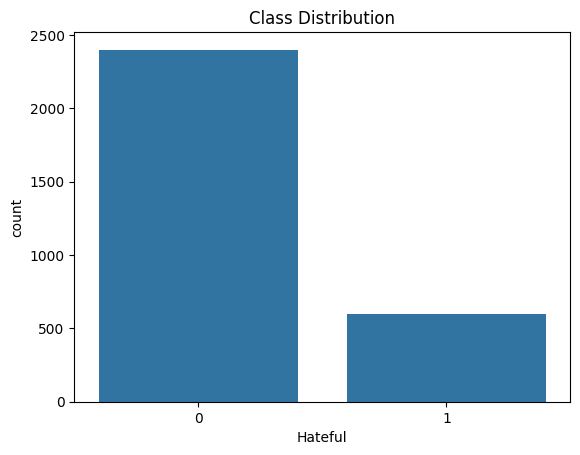

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class distribution
sns.countplot(x='Hateful', data=data)
plt.title('Class Distribution')
plt.show()


Explanation of code:

Matplotlib and Seaborn:

 These libraries are used for data visualization.

Countplot: sns.countplot():

 is used to create a bar plot showing the count of each class. This visual representation makes it easier to understand the degree of imbalance in the dataset.

Stage 3: Handling Data Imbalance

Resampling Techniques:
Objective:
Adjust the class distribution to create a balanced dataset.

Oversampling:::::

Definition:
 Increasing the number of instances in the minority class by randomly duplicating some of its instances.

Reason:
 Helps balance the dataset by making the minority class as frequent as the majority class.


In [3]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = data[data['Hateful'] == 0]
minority_class = data[data['Hateful'] == 1]

# Upsample minority class
minority_upsampled = resample(minority_class,
                              replace=True,    # sample with replacement
                              n_samples=len(majority_class), # to match majority class
                              random_state=42) # reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([majority_class, minority_upsampled])

# Display new class counts
print(data_upsampled['Hateful'].value_counts())


Hateful
0    2400
1    2400
Name: count, dtype: int64


Undersampling:::::
Definition:
 Reducing the number of instances in the majority class by randomly removing some of its instances.

Reason:
 Helps balance the dataset by making the majority class as frequent as the minority class.

In [4]:
# Downsample majority class
majority_downsampled = resample(majority_class,
                                replace=False,    # sample without replacement
                                n_samples=len(minority_class), # to match minority class
                                random_state=42) # reproducible results

# Combine minority class with downsampled majority class
data_downsampled = pd.concat([majority_class, majority_downsampled])

# Display new class counts
print(data_downsampled['Hateful'].value_counts())


Hateful
0    3000
Name: count, dtype: int64


Synthetic Data Generation using SMOTE:::::

Objective:
 Generate synthetic samples for the minority class to balance the dataset.

SMOTE (Synthetic Minority Over-sampling Technique):


Definition:
 A technique that generates synthetic samples for the minority class by interpolating between existing minority class samples.

Reason:
 More sophisticated than simple oversampling as it generates new, synthetic instances rather than duplicating existing ones.


In [5]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = data['Comment']
y = data['Hateful']

# Convert text data to numeric using TF-IDF or CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_vectorized, y)

# Display new class counts
print(pd.Series(y_smote).value_counts())


Hateful
0    2400
1    2400
Name: count, dtype: int64


Stage 4: Model Training and Evaluation::

Baseline Model without Addressing Imbalance:
Objective:
 Train and evaluate a model on the original imbalanced dataset to establish a baseline performance.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train a baseline model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[494   0]
 [ 73  33]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       494
           1       1.00      0.31      0.47       106

    accuracy                           0.88       600
   macro avg       0.94      0.66      0.70       600
weighted avg       0.89      0.88      0.85       600



Explanation:


Train-test split:
 Divides the data into training and testing sets.

Logistic Regression:
 A simple, interpretable classification algorithm used as a baseline.

Evaluation:
 confusion_matrix and classification_report provide detailed metrics on model performance.

Model with Resampling Techniques

Objective:
 Train and evaluate a model on a balanced dataset created using resampling techniques.

In [7]:
# Use the resampled data from previous steps
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Train model on resampled data
model.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred_resampled = model.predict(X_test_resampled)
print(confusion_matrix(y_test_resampled, y_pred_resampled))
print(classification_report(y_test_resampled, y_pred_resampled))


[[472   9]
 [ 30 449]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       481
           1       0.98      0.94      0.96       479

    accuracy                           0.96       960
   macro avg       0.96      0.96      0.96       960
weighted avg       0.96      0.96      0.96       960



Explanation:


Train-test split on resampled data:

 Ensures that both training and testing sets are balanced.

Training and evaluation:

 Same as the baseline model but on the balanced dataset to see if performance improves.